In [19]:

# normal 
import pandas as pd


# imports 
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

# Geo-location stuffs
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [20]:
#!conda install -c conda-forge geojson

---

In [21]:
# loads in crash data

df = pd.read_csv('./data/crash_features_2019.csv')

In [22]:
df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))

In [23]:
# Creates sample crash data

#df = df.sample(2_000)

In [24]:
"""
    Creating Reduced Columns 

"""

# list of columns names

columns_names = list(df.columns)

#removing names of columns you want to KEEP

columns_names.remove('ZIP CODE')
columns_names.remove('BOROUGH')
columns_names.remove('LATITUDE')
columns_names.remove('LOCATION')
columns_names.remove('LONGITUDE')
columns_names.remove('CONTRIBUTING FACTOR VEHICLE 1')
columns_names.remove('CRASH TIME')
columns_names.remove('CRASH DATE')
columns_names.remove('date')
columns_names.remove('geometry')

#dropping the rest of the list 

df = df.drop(columns = columns_names, axis = 1)

In [25]:
df.head(2)

,date,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,CONTRIBUTING FACTOR VEHICLE 1,geometry
0,2019-01-01,01/01/2019,1:10,MANHATTAN,10011.0,40.737360,-73.996850,"(40.73736, -73.99685)",Driver Inattention/Distraction,POINT (-73.99685 40.73736)
1,2019-01-01,01/01/2019,15:00,BRONX,10466.0,40.892624,-73.859924,"(40.892624, -73.859924)",Other Vehicular,POINT (-73.85992 40.89262)


In [26]:
type(df)

geopandas.geodataframe.GeoDataFrame

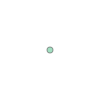

In [27]:
df.iloc[0,-1]

---

## Geo Data

#### Neighborhood polygon

In [28]:
# loads neighboorhood data

neighborhoods = gpd.read_file('./neighborhoods/d085e2f8d0b54d4590b1e7d1f35594c1pediacitiesnycneighborhoods.geojson.json')

In [29]:
# checks shape of data

neighborhoods.shape

(310, 5)

In [30]:
# looks at all brooklyn neighborhoods

neighborhoods[neighborhoods['borough'] == 'Brooklyn']

,neighborhood,boroughCode,borough,@id,geometry
7,Bath Beach,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.99381 40.60195, -73.99962 40.596..."
9,Bay Ridge,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-74.01475 40.63397, -74.01475 40.633..."
16,Bedford-Stuyvesant,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.94115 40.70028, -73.90548 40.680..."
20,Bensonhurst,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.97300 40.60883, -73.97299 40.608..."
21,Bergen Beach,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.91732 40.63101, -73.90396 40.624..."
...,...,...,...,...,...
270,South Slope,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.97686 40.66461, -73.97685 40.664..."
278,Sunset Park,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.99280 40.66553, -73.99300 40.665..."
293,Vinegar Hill,3,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.97905 40.70597, -73.97906 40.705..."
303,Williamsburg,4,Brooklyn,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.95757 40.72510, -73.95300 40.722..."


In [31]:
# Geo location  polygon for Astoria queens

astoria =  neighborhoods[neighborhoods['neighborhood'] == 'Astoria']
astoria

,neighborhood,boroughCode,borough,@id,geometry
6,Astoria,4,Queens,http://nyc.pediacities.com/Resource/Neighborho...,"POLYGON ((-73.90160 40.76777, -73.90270 40.766..."


In [32]:
astoria['geometry']

6    POLYGON ((-73.90160 40.76777, -73.90270 40.766...
Name: geometry, dtype: geometry

In [33]:
#df['CRASH TIME'].splt(:)

In [34]:
# Hospitals 

# wrong gps locations going to update

#hospitals = gpd.read_file("./hospitals/nyu_2451_34494.shp")
#hospitals.crs = {'init': 'epsg:4326'}
#hospitals.head(2)

## Geo calculation stuffs

In [35]:
# test points 

p1 = Point(24.952242, 60.1696017)
type(p1)

shapely.geometry.point.Point

In [36]:
# Test sample of point

a = df.iloc[0,-1]
type(a)

shapely.geometry.point.Point

In [37]:
# test of polygon

b = astoria.geometry.iloc[0]
type(b)

shapely.geometry.polygon.Polygon

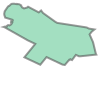

In [38]:
b

In [39]:
# Checks intercept of polygon, using the command - contains - 

b.contains(a)

False

In [40]:
# apply the contains method to to polygon and points 
row_indices=[]
poly = astoria.geometry.iloc[0]
for i, j in df.iterrows():
    if (poly.contains(j['geometry'])):
        row_indices.append(i)
    
print('number of crashes: ', len(row_indices))

number of crashes:  2066


In [41]:
astoria_crashes_2019=df[df.index.isin(row_indices)]
astoria_crashes_2019.head()

,date,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,CONTRIBUTING FACTOR VEHICLE 1,geometry
55,2019-01-01,01/01/2019,19:30,NaN,NaN,40.766980,-73.916900,"(40.76698, -73.9169)",Pedestrian/Bicyclist/Other Pedestrian Error/Co...,POINT (-73.91690 40.76698)
72,2019-01-01,01/01/2019,9:58,NaN,NaN,40.770390,-73.917710,"(40.77039, -73.91771)",Driver Inattention/Distraction,POINT (-73.91771 40.77039)
204,2019-01-01,01/01/2019,16:55,NaN,NaN,40.758602,-73.913790,"(40.758602, -73.91379)",Unspecified,POINT (-73.91379 40.75860)
368,2019-01-01,01/01/2019,3:30,QUEENS,11103.0,40.759020,-73.913450,"(40.75902, -73.91345)",Fatigued/Drowsy,POINT (-73.91345 40.75902)
534,2019-01-02,01/02/2019,9:30,NaN,NaN,40.769993,-73.915825,"(40.769993, -73.915825)",Driver Inattention/Distraction,POINT (-73.91582 40.76999)


In [42]:
astoria_crashes_2019.to_csv('./data/crashes_in_astoria_2019.csv')

In [43]:
contributing_factor_1=astoria_crashes_2019['CONTRIBUTING FACTOR VEHICLE 1'].unique()
len(contributing_factor_1)

37

There are 37 unique factors that are listed as contributing factors for vehicle 1.

In [44]:
astoria_crashes_2019_contributing_factors=astoria_crashes_2019.groupby(by='CONTRIBUTING FACTOR VEHICLE 1').count()[['LOCATION']]
astoria_crashes_2019_contributing_factors.rename({'LOCATION':'COUNT OF CRASHES'},inplace=True)
astoria_crashes_2019_contributing_factors.sort_values(by='LOCATION',ascending=False,inplace=True)
astoria_crashes_2019_contributing_factors.head()

,LOCATION
CONTRIBUTING FACTOR VEHICLE 1,
Driver Inattention/Distraction,619
Unspecified,318
Failure to Yield Right-of-Way,206
Following Too Closely,180
Passing or Lane Usage Improper,149


Let's plot a horizontal barchart to show the number of crashes contributed by each factor.

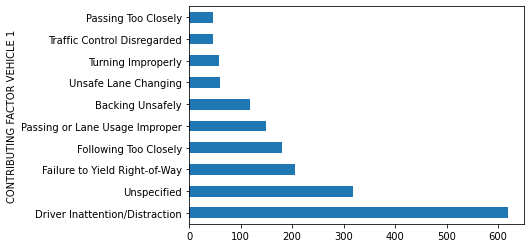

In [45]:
import matplotlib.pyplot as plt
ax=astoria_crashes_2019_contributing_factors.head(10).plot(kind='barh')
ax.get_legend().remove()
plt.savefig('top_contributing_factors.png')

### MAP test

In [46]:
# map with dots that we can color code


#m_1 = folium.Map(location=[40.734603, -73.9903599], tiles='cartodbpositron', zoom_start=10.5)

#def color_producer(val):
#    if val <= 12:
#        return 'forestgreen'
#    else:
#        return 'darkred'

    
    
    
    
# Add a bubble map to the base map
#for i in range(0,len(df)):
#    Circle(
#        location=[df.iloc[i]['LATITUDE'], df.iloc[i]['LONGITUDE']],
#        radius=20,
#        color='forestgreen').add_to(m_1) #df.iloc[i]['CRASH TIME'])

#m_1


In [47]:
# Map that clusters the crashes 



m_2 = folium.Map(location=[40.734603, -73.9903599], tiles='cartodbpositron', zoom_start=10.5)

mc = MarkerCluster()
for idx, row in astoria_crashes_2019.iterrows():
    #if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
    mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']]))
m_2.add_child(mc)

for i in range(0,len(astoria_crashes_2019)):
    Circle(
        location=[astoria_crashes_2019.iloc[i]['LATITUDE'], astoria_crashes_2019.iloc[i]['LONGITUDE']],
        radius=20,
        color='forestgreen').add_to(m_2)

m_2

In [48]:
m_2
plt.savefig('Astoria_crashes.png')

<Figure size 432x288 with 0 Axes>